In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Exercise 1

In [ ]:
##Ejemplo


# Exercise 2

In [20]:
import numpy as np

In [22]:
def kMeans(D, k, eps, mu = None):
    #Implementacion 
    import numpy as np

    n, d = D.shape  # n: number of data points, d: dimensionality of data
    t = 0
    
    # Step 2: Randomly initialize k centroids
    mu_t = D[np.random.choice(n, k, replace=False)]  # Randomly select k data points as initial centroids
    
    while True:
        t += 1
        C = [[] for _ in range(k)]  # Initialize clusters
        
        # Step 4: Cluster Assignment Step
        for j in range(n):
            xj = D[j]
            i_star = np.argmin(np.linalg.norm(xj - mu_t, axis=1))  # Find the closest centroid
            C[i_star].append(xj)
        
        # Step 7: Centroid Update Step
        mu_t_minus_1 = np.copy(mu_t)
        for i in range(k):
            if len(C[i]) > 0:
                mu_t[i] = np.mean(C[i], axis=0)
            else:
                # If a cluster becomes empty, assign a new random centroid
                mu_t[i] = D[np.random.choice(n)]
        
        # Step 11: Check termination criterion
        if np.linalg.norm(mu_t - mu_t_minus_1) <= eps:
            break
    
    return mu_t, C

# Example usage:
if __name__ == "__main__":
    # Generate random 2D data points for testing
    np.random.seed(0)
    data_points = np.random.rand(100, 2) * 10

    # Number of clusters and termination criterion
    k = 3
    eps = 1e-4

    centroids, clusters = kMeans(data_points, k, eps)
    print("Final Centroids:\n", centroids)
    print("Clusters:\n", clusters)


Final Centroids:
 [[7.61673384 4.07653637]
 [2.72237147 2.10979969]
 [3.52178633 7.84887336]]
Clusters:
 [[array([6.02763376, 5.44883183]), array([9.63662761, 3.83441519]), array([7.91725038, 5.2889492 ]), array([9.78618342, 7.99158564]), array([5.21848322, 4.1466194 ]), array([6.12095723, 6.16933997]), array([9.43748079, 6.81820299]), array([6.97631196, 0.60225472]), array([6.66766715, 6.7063787 ]), array([5.7019677 , 4.38601513]), array([9.88373838, 1.02044811]), array([6.53108325, 2.53291603]), array([6.56329589, 1.38182951]), array([8.2099323 , 0.97101276]), array([8.37944907, 0.96098408]), array([9.76459465, 4.68651202]), array([9.76761088, 6.0484552 ]), array([7.39263579, 0.39187792]), array([5.66601454, 2.65389491]), array([8.28940029, 0.04695476]), array([6.77816537, 2.70007973]), array([5.92041931, 5.72251906]), array([6.99479275, 2.97436951]), array([8.1379782 , 3.96505741]), array([8.81103197, 5.81272873]), array([8.81735362, 6.9253159 ]), array([7.2525428 , 5.01324382]), ar

In [15]:
def DBSCAN(D, epsilon, minpts):

    def range_query(p):
        neighbors = []
        for q in range(len(D)):
            euclidean_distance = 0
            for a, b in zip(D[q], D[p]):
                euclidean_distance += (a - b) ** 2
            euclidean_distance = euclidean_distance ** 2
            if euclidean_distance <= epsilon:
                neighbors.append(q)
        return neighbors

    def density_connected(x, k)
        id[x] = k
        for y in range_query(x):
            if id[y] == -1 and y in core_points:
                density_connected(y, k)

    n = len(D)
    id = [-1] * n  # Initialize cluster assignments with -1
    core_points = set()

    for xi in range(n):
        neighbors = range_query(xi)
        if len(neighbors) >= minpts:
            core_points.add(xi)

    k = 0
    for xi in range(n):
        if id[xi] == -1:
            if xi in core_points:
                k += 1
                id[xi] = k          
                density_connected(xi, k)

    clusters = {}
    for i in range(1, k + 1):
        clusters[i] = [D[x] for x in range(n) if id[x] == i]

    noise = [D[x] for x in range(n) if id[x] == -1]
    border = [D[x] for x in range(n) if x not in core_points and x not in noise]

    return clusters, core_points, border, noise

# Example usage:
if __name__ == "__main__":
    # Sample data points represented as a list of tuples (x, y)
    data_points = [(1, 2), (2, 2), (2, 3), (8, 7), (8, 8), (25, 80), (30, 85), (31, 85)]

    # DBSCAN parameters
    epsilon = 3.0
    minpts = 2

    clusters, core_points, border, noise = DBSCAN(data_points, epsilon, minpts)
    print("Clusters:", clusters)
    print("Core Points:", core_points)
    print("Border Points:", border)
    print("Noise Points:", noise)


0
1
2
3
4
6
7
Clusters: {1: [(1, 2), (2, 2), (2, 3)], 2: [(8, 7), (8, 8)], 3: [(30, 85), (31, 85)]}
Core Points: {0, 1, 2, 3, 4, 6, 7}
Border Points: [(25, 80)]
Noise Points: [(25, 80)]


# Exercise 3

In [129]:
def plotClusters(A, C, dimX, dimY, dimZ = None, ax = None):
    if ax == None:
        fig, ax = plt.subplots()

    num_categories = len(set(C))
    if -1 not in C:
        colormap = sns.color_palette(None,num_categories)
    else:
        C = [x+1 for x in C]
        colormap = [(0, 0, 0)]
        markers = ['x']
        temp = (sns.color_palette(None,num_categories-1))
        for color in temp:
            colormap.append(color)
            markers.append('o')


    if dimZ is None:
        for i, point in enumerate(A.T):
            ax.scatter(point[dimX],point[dimY],c=colormap[C[i]],marker=markers[C[i]])
            ax.set_xlabel(f'Dimension: {dimX}', fontweight ='bold')
            ax.set_ylabel(f'Dimension: {dimY}', fontweight ='bold')
    else:
        ax.axis('off')
        ax = plt.axes(projection ="3d")
        for i, point in enumerate(A.T):
            ax.scatter(point[dimX],point[dimY],point[dimZ],c=colormap[C[i]],marker=markers[C[i]])
            ax.set_xlabel(f'Dimension: {dimX}', fontweight ='bold')
            ax.set_ylabel(f'Dimension: {dimY}', fontweight ='bold')
            ax.set_zlabel(f'Dimension: {dimZ}', fontweight ='bold')

    return ax

C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_15108\550518408.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(point[dimX],point[dimY],point[dimZ],c=colormap[C[i]],marker=markers[C[i]])


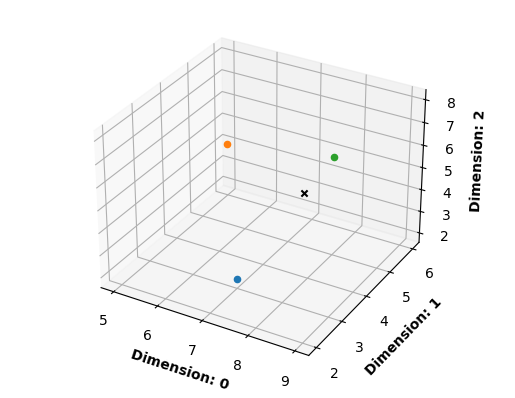

In [130]:
A = np.array([[7,5,8,9],[3,6,5,2],[2,4,6,8]])
C = [0,1,2,-1]

fig, ax = plt.subplots()

dimZ = 2

ax = plotClusters(A=A,C=C,dimX=0,dimY=1,dimZ=dimZ,ax=ax)
plt.show()

In [ ]:
#Correr el codigo con PCA 18 veces ir plottear